# Naive k-means implementation in 1 hour

## Implementation

In [1]:
import typing as t
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
def generate_dataset(
    size: int = 20,
    dim: int = 2,
    min: int = -10,
    max: int = 10,
    seed: int = 0,
) -> np.ndarray:
    return (max - min) * np.random.default_rng(seed).random((size, dim)) + min

In [3]:
class KMeans:
    def __init__(self, n_clusters: int = 8, max_iter: int = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        self.centroids_history = []
        self.labels_history = []
        self.centroids = None
        self.labels = None

    def fit(self, X: np.ndarray):
        data = X
        self.centroids = self._initialize_clusters(
            data=data,
            n_clusters=self.n_clusters,
        )
        self.labels_history = []
        self.centroids_history = [self.centroids]

        for _ in range(self.max_iter):
            self.labels = self._assign_points(data=data, centroids=self.centroids)
            self.labels_history.append(self.labels)
            self.centroids = KMeans._update_centroids(
                data=data,
                assignations=self.labels,
                n_clusters=self.n_clusters,
            )
            self.centroids_history.append(self.centroids)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.centroids is None:
            raise ValueError(
                "Centroids have not been computed yet, run 'fit' before calling for 'predict'"
            )
        return self._assign_points(data=X, centroids=self.centroids)

    @staticmethod
    def _initialize_clusters(
        data: np.ndarray, n_clusters: int, seed: int = 0
    ) -> np.ndarray:
        if len(data.shape) != 2:
            raise ValueError(f"Expected data of shape 2, shape={data.shape}")

        min = data.min()
        max = data.max()
        dim = data.shape[1]
        return (max - min) * np.random.default_rng(seed).random((n_clusters, dim)) + min

    @staticmethod
    def _assign_points(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        # e.g. [ [0.71, 12.6] , [12.3, 0.40] ... ]
        distances = cdist(data, centroids)
        # e.g. array([0, 1, ... ])
        return np.argmin(distances, axis=1)

    @staticmethod
    def _update_centroids(
        data: np.ndarray, assignations: np.ndarray, n_clusters: int
    ) -> np.ndarray:
        new_centroids = []
        for i in range(n_clusters):
            mask = assignations == i
            data_in_cluster = data[mask]
            # WARNING: if no points are within the cluster, we should probably reset it?
            new_centroid = data_in_cluster.mean(axis=0)
            new_centroids.append(new_centroid)
        return np.array(new_centroids)

## Running K-means on a random dataset

In [4]:
data = generate_dataset(size=200)
print(data.shape)
# data

(200, 2)


In [5]:
kmeans = KMeans(n_clusters=5, max_iter=3)

In [6]:
kmeans.fit(X=data)

In [7]:
kmeans.predict(np.array([[0, 0], [5, 5], [10, 10]]))

array([3, 2, 2])

In [8]:
# kmeans.centroids_history

In [9]:
# kmeans.labels

## Visualizing label evolution during fit

In [10]:
# add more colors if you have more than 7 clusters
colors = {
    0: "red",
    1: "blue",
    2: "green",
    3: "cyan",
    4: "yellow",
    5: "orange",
    6: "purple",
}
figsize = (5, 2)

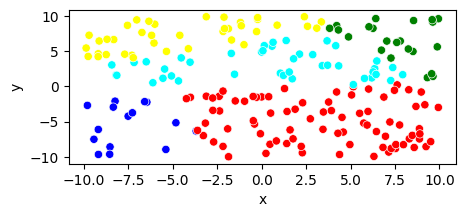

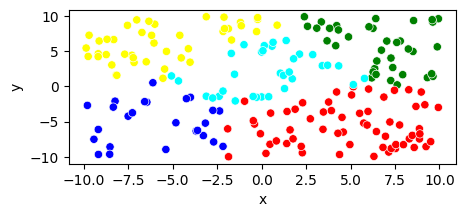

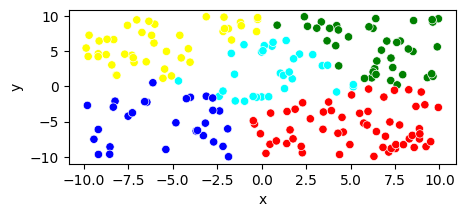

In [11]:
# here we display the evolution of labels
df = pd.DataFrame(data, columns=["x", "y"])
for i, labels in enumerate(kmeans.labels_history):
    plt.figure(i, figsize=figsize)
    df["color"] = pd.Series(labels).apply(lambda x: colors.get(x, "black"))
    sns.scatterplot(x=df["x"], y=df["y"], c=df["color"]).plot()